In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from astropy.io import fits

In [12]:
f = fits.open('/home/scratch/mabitbol/scan02/scan_02_40.raw.vegas/scan_02_40.raw.vegas.B.fits',memmap=True)

In [13]:
h = f[1]

In [72]:
h.data['TCAL'][:10]

array([ 5.63695908,  5.63695908,  5.39826822,  5.39826822,  5.63695908,
        5.63695908,  5.63695908,  5.63695908,  5.63695908,  5.63695908], dtype=float32)

In [6]:
d = h.data['DATA']

In [9]:
f.close()

In [42]:
def reduce_scan(filename,final_channels=512):
    result = {}
    f = fits.open(filename,memmap=True)
    h = f[1]
    result['ra'] = h.data['CRVAL2']
    result['dec'] = h.data['CRVAL3']
    result['sra'] = h.data['CRVAL2'][::8]
    result['sdec'] = h.data['CRVAL3'][::8]
    result['tcalx'] = h.data['TCAL'][:1]
    result['tcaly'] = h.data['TCAL'][2:3]
    d = h.data['DATA']
    result['xxoff'] = d[::8,:].reshape((-1,final_channels,16384//final_channels)).mean(2)
    result['xxon'] = d[1::8,:].reshape((-1,final_channels,16384//final_channels)).mean(2)
    result['yyoff'] = d[2::8,:].reshape((-1,final_channels,16384//final_channels)).mean(2)
    result['yyon'] = d[3::8,:].reshape((-1,final_channels,16384//final_channels)).mean(2)
    result['xyoff'] = d[4::8,:].reshape((-1,final_channels,16384//final_channels)).mean(2)
    result['xyon'] = d[5::8,:].reshape((-1,final_channels,16384//final_channels)).mean(2)
    result['yxoff'] = d[6::8,:].reshape((-1,final_channels,16384//final_channels)).mean(2)
    result['yxon'] = d[7::8,:].reshape((-1,final_channels,16384//final_channels)).mean(2)
    for name in h.columns.names:
        if name not in ['DATA', 'CRVAL2','CRVAL3','TCAL']:
            if len(np.unique(h.data[name]))==1:
                print "found constant column",name
                result[name] = h.data[name][:1]
            else:
                result[name] = h.data[name]
    outfile = filename + '.reduced.npz'
    print "saving to",outfile
    np.savez(outfile,**result)
    

In [43]:
reduce_scan('/home/scratch/mabitbol/S140/Daisy/scan_02_41.raw.vegas/scan_02_41.raw.vegas.B.fits')

found constant column OBJECT
found constant column BANDWID
found constant column DURATION
found constant column EXPOSURE
found constant column TSYS
found constant column TDIM7
found constant column TUNIT7
found constant column CTYPE1
found constant column CRVAL1
found constant column CRPIX1
found constant column CDELT1
found constant column CTYPE2
found constant column CTYPE3
found constant column OBSERVER
found constant column OBSID
found constant column SCAN
found constant column OBSMODE
found constant column FRONTEND
found constant column VELDEF
found constant column VFRAME
found constant column RVSYS
found constant column OBSFREQ
found constant column TAMBIENT
found constant column PRESSURE
found constant column HUMIDITY
found constant column RESTFREQ
found constant column FREQRES
found constant column EQUINOX
found constant column RADESYS
found constant column TRGTLONG
found constant column TRGTLAT
found constant column FEED
found constant column SRFEED
found constant column FEEDX

In [47]:
ls -lhtr /home/scratch/mabitbol/S140/Daisy/scan_02_40.raw.vegas/scan_02_40.raw.vegas.B.fits.reduced.npz

-rw-r--r-- 1 gjones observer 117M Apr  5 15:55 /home/scratch/mabitbol/S140/Daisy/scan_02_40.raw.vegas/scan_02_40.raw.vegas.B.fits.reduced.npz


In [68]:
nzoff = np.load('/home/scratch/mabitbol/3C280/OnOff/scan131')
nzon = np.load('/home/scratch/mabitbol/3C273/OnOff/scan127.raw.vegas/scan127.raw.vegas.B.fits.reduced.npz')

In [65]:
xx = nz['xxoff']

In [66]:
yy = nz['yyoff']

In [19]:
xx = (nz['xxoff']*nz['TCAL'][::8][:,None]/(nz['xxon']-nz['xxoff']))[:,100:400].mean(1)

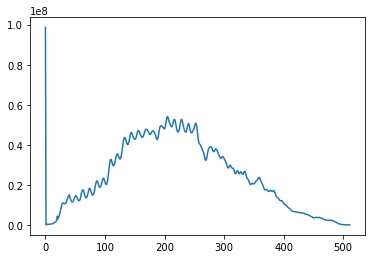

In [67]:
plot(xx.mean(0))

In [21]:
def naive_map(data,ra,dec,ra_num_bins=60,dec_num_bins=50):
    ra_bins = np.linspace(ra.min(),ra.max(),ra_num_bins)
    dec_bins = np.linspace(dec.min(),dec.max(),dec_num_bins)
    p,_,_ = np.histogram2d(ra,dec,bins=(ra_bins,dec_bins),weights=data)
    hits,_,_ = np.histogram2d(ra,dec,bins=(ra_bins,dec_bins))
    return p/hits, hits

In [22]:
p,hits = naive_map(xx,nz['ra'][::8],nz['dec'][::8])

/users/gjones/miniconda2/envs/gbt/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in divide


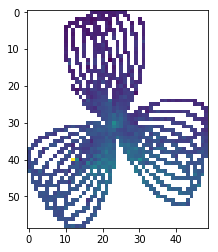

In [23]:
imshow(p)

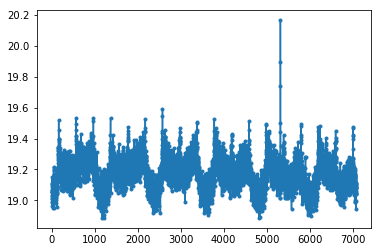

In [33]:
plot(xx,'.-')
#xlim(5300,5340)

In [38]:
pxx,fr = mlab.psd(xx,Fs=25,NFFT=4096)

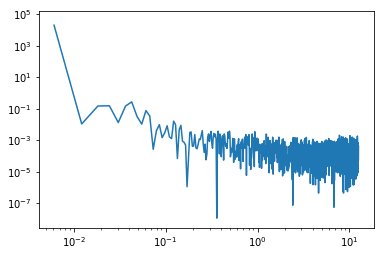

In [39]:
loglog(fr,pxx)

(15, 25)

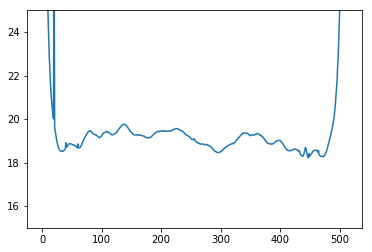

In [18]:
plot(xx.mean(0))
ylim(15,25)

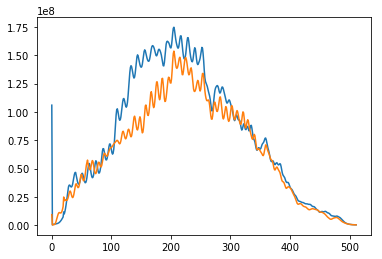

In [11]:
plot(xx.mean(0))
plot(yy.mean(0))



In [73]:
xy = nzon['xyoff'] + 1j*nzon['yxoff']
xyoff = nzoff['xyoff'] + 1j*nzoff['yxoff']

In [ ]:
plo

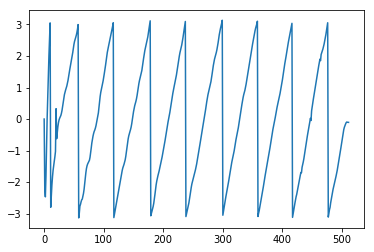

In [89]:
plot(np.angle(xy.mean(0)))

(0, 0.25)

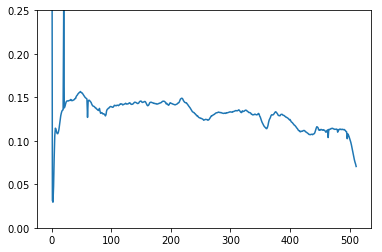

In [87]:
plot(np.sqrt(np.abs(xy.mean(0))/(nzon['xxoff']+nzon['yyoff']).mean(0)))
ylim(0,0.25)

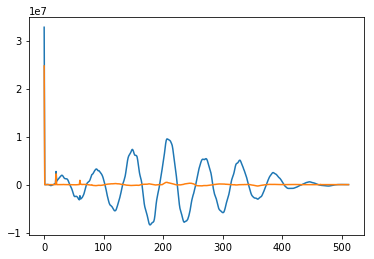

In [75]:
plot(np.real(xy.mean(0)))
plot(np.real(xyo
             ff.mean(0)))


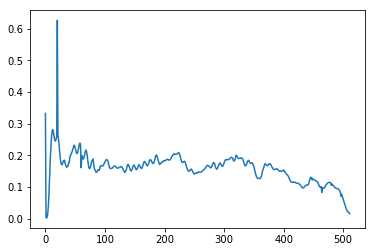

In [70]:
plot(np.abs(xy.mean(0))/(np.abs(xx.mean(0))))

In [ ]:
xx.shape

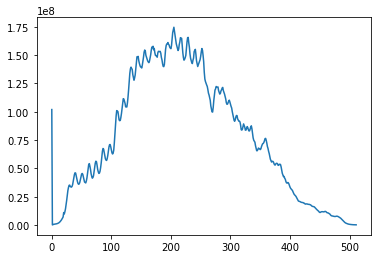

In [51]:
plot(xx[0])

In [44]:
import glob

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import glob

In [4]:
files = glob.glob('/home/scratch/mabitbol/*/Daisy/*/*B.fits')

In [5]:
files

['/home/scratch/mabitbol/S140/Daisy/scan41.raw.vegas/scan41.raw.vegas.B.fits',
 '/home/scratch/mabitbol/S140/Daisy/scan42.raw.vegas/scan42.raw.vegas.B.fits',
 '/home/scratch/mabitbol/S140/Daisy/scan46.raw.vegas/scan46.raw.vegas.B.fits',
 '/home/scratch/mabitbol/S140/Daisy/scan47.raw.vegas/scan47.raw.vegas.B.fits',
 '/home/scratch/mabitbol/S140/Daisy/scan44.raw.vegas/scan44.raw.vegas.B.fits',
 '/home/scratch/mabitbol/S140/Daisy/scan45.raw.vegas/scan45.raw.vegas.B.fits',
 '/home/scratch/mabitbol/S140/Daisy/scan_02_18.raw.vegas/scan_02_18.raw.vegas.B.fits',
 '/home/scratch/mabitbol/S140/Daisy/scan_02_20.raw.vegas/scan_02_20.raw.vegas.B.fits',
 '/home/scratch/mabitbol/S140/Daisy/scan_02_23.raw.vegas/scan_02_23.raw.vegas.B.fits',
 '/home/scratch/mabitbol/S140/Daisy/scan_02_25.raw.vegas/scan_02_25.raw.vegas.B.fits',
 '/home/scratch/mabitbol/S140/Daisy/scan_02_33.raw.vegas/scan_02_33.raw.vegas.B.fits',
 '/home/scratch/mabitbol/S140/Daisy/scan_02_34.raw.vegas/scan_02_34.raw.vegas.B.fits',
 '/h

In [6]:
len(files)

31

In [7]:
lines = []
for k,filename in enumerate(files):
    if 'Spider' in filename:
        continue
    if 'other' in filename:
        continue
    lines.append('python reduce_scan.py %s &' % filename)
    if k % 8 == 7:
        lines.append('wait')

In [8]:
len(lines)

34

In [9]:
lines = ['source activate gbt'] + lines
with open('reduce_script.sh','w') as fh:
    fh.write('\n'.join(lines))

In [ ]:
h.data['AZI']

In [17]:
import pandas as pd

In [33]:
h.data['CRVAL1'][0]

5625000000.0

In [16]:
h.data['DATE-OBS']

chararray(['2017-04-05T10:17:09.00', '2017-04-05T10:17:09.00',
       '2017-04-05T10:17:09.00', ..., '2017-04-05T10:22:05.96',
       '2017-04-05T10:22:05.96', '2017-04-05T10:22:05.96'], 
      dtype='|S22')

In [14]:
h.data.columns.names

['OBJECT',
 'BANDWID',
 'DATE-OBS',
 'DURATION',
 'EXPOSURE',
 'TSYS',
 'DATA',
 'TDIM7',
 'TUNIT7',
 'CTYPE1',
 'CRVAL1',
 'CRPIX1',
 'CDELT1',
 'CTYPE2',
 'CRVAL2',
 'CTYPE3',
 'CRVAL3',
 'CRVAL4',
 'OBSERVER',
 'OBSID',
 'SCAN',
 'OBSMODE',
 'FRONTEND',
 'TCAL',
 'VELDEF',
 'VFRAME',
 'RVSYS',
 'OBSFREQ',
 'LST',
 'AZIMUTH',
 'ELEVATIO',
 'TAMBIENT',
 'PRESSURE',
 'HUMIDITY',
 'RESTFREQ',
 'FREQRES',
 'EQUINOX',
 'RADESYS',
 'TRGTLONG',
 'TRGTLAT',
 'SAMPLER',
 'FEED',
 'SRFEED',
 'FEEDXOFF',
 'FEEDEOFF',
 'SUBREF_STATE',
 'SIDEBAND',
 'PROCSEQN',
 'PROCSIZE',
 'PROCSCAN',
 'PROCTYPE',
 'LASTON',
 'LASTOFF',
 'TIMESTAMP',
 'QD_XEL',
 'QD_EL',
 'QD_BAD',
 'QD_METHOD',
 'VELOCITY',
 'ZEROCHAN',
 'DOPFREQ',
 'ADCSAMPF',
 'VSPDELT',
 'VSPRVAL',
 'VSPRPIX',
 'SIG',
 'CAL',
 'CALTYPE',
 'TWARM',
 'TCOLD',
 'CALPOSITION',
 'IFNUM',
 'PLNUM',
 'FDNUM']

In [10]:
d.shape

(56648, 16384)

In [11]:
ra2 = h.data['CRVAL2']
dec2 = h.data['CRVAL3']

ValueError: I/O operation on closed file

In [29]:
ra = np.concatenate((ra,ra2))
dec = np.concatenate((dec,dec2))
d = np.concatenate((d,d2),axis=0)

In [105]:
ra_bins=np.linspace(ra.min(),ra.max(),60)
dec_bins = np.linspace(dec.min(),dec.max(),50)

In [57]:
offx = d[::8,:]
onx = d[1::8,:]
gain = (onx-offx).mean(0)
scaled = offx/gain

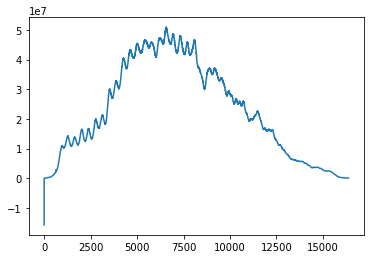

In [58]:
plot(gain)

In [106]:
h,_,_ = np.histogram2d(ra[::8],dec[::8],weights=scaled[:,2500:13000].mean(1),bins=(ra_bins,dec_bins))
hits,_,_ =np.histogram2d(ra[::8],dec[::8],bins=(ra_bins,dec_bins))

In [107]:
m = 5.63*h/hits
m = m - np.nanmin(m)

/users/gjones/miniconda2/envs/gbt/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


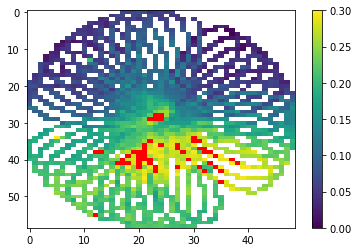

In [108]:
imshow(m,aspect='auto')
colorbar()
clim(0,.3)
#clim(3.36,3.42)
#clim(96302184.0,96302184.0+1.45e6)

In [112]:
1e12/40e6

25000.0

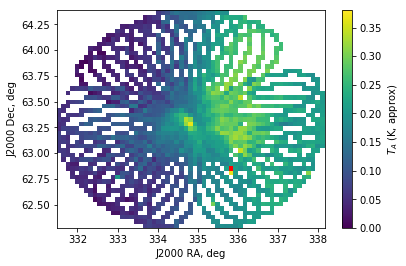

In [111]:
pc = pcolormesh(ra_bins,dec_bins,m.T)
pc.cmap.set_under('w')
pc.cmap.set_over('r')

cb = colorbar()
cb.set_label('$T_A$ (K, approx)')
clim(0,.38)
#clim(3.36,3.42)
#clim(96302184.0,96302184.0+1.45e6)
ylabel('J2000 Dec, deg')
xlabel('J2000 RA, deg')


In [43]:
np.nanmin(h/hits)

/users/gjones/miniconda2/envs/gbt/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


96302184.0

(12380, 12400)

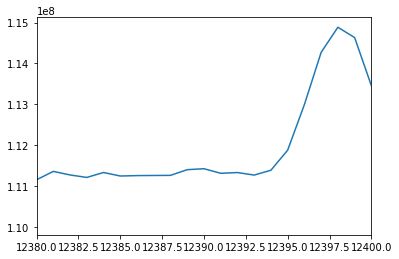

In [50]:
plot(d[::8,5000:13000].mean(1))
xlim(12380,12400)

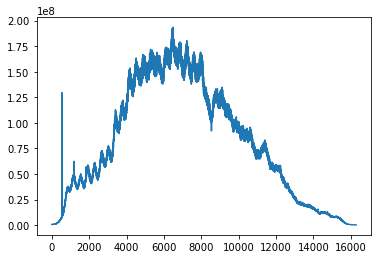

In [52]:
plot(d[::8,:][12397,100:])